OLS 회귀분석 (statsmodels)
전처리한 자료에 회귀분석을 적용해 변수별 회귀계수를 구할 수 있다.

python에서 다양한 통계 분석을 할 수 있도록 기능을 제공

다중회귀 공식
yi=β0+β1x1+β2x2⋯βnxn+

### 단순회귀
- 연속형 종속변수와 독립변수 간 선형관계 및 설명을 확인 하는 기법
- 종속변수와 독립변수가 각각 하나인 경우 단순 선형 회귀 모형 
- 오차 평가 지표로 모델의 성능을 평가. 
- statsmodels- ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)
    - 종속변수, 독립변수 , fit()모델실행, predict()예측, 변수명에 오점 또는 특수문자 오류발생
- sklearn  - LinearRegression() 
    - fit_intercept 로 절편의 적합 유무를 설정 , 
    - 모델의 객체로 coef_, intercept_ 속성으로 계수, 절편이 확인 가능하다. 
    - fit()모델실행, predict()예측
    - MAE  : mean_absolute_error()
    - MSE   :mean_squared_error()
    - RMSE

###  다중 회귀
- 연속형 종속변수와 두개 이상의 독립변수 간 선형관계 및 설명을 확인 하는 기법
- 필요 시 모델 성능향상을 위해서 파생변수 생성 및 성능 비교
- 명목형 변수가 독립변수인 경우는 가변수 변환 후 모델 구현 
- 다중 공선성 문제 
    - 독립변수간에 강한 상관관계가 발생되는 문제 
    - 상관곗를 확인해서 그 중 값이 높은것을 사전에 제거 
    - 회귀모델 생성하게 되면 분산에 대한 팽창계수("VIF") 확인 (10이상) 관련된 변수 처리 
    - from patsy import dmatrices : 수식기반 데이터 행렬을 생성 / 분산 팽창 계수를 확인하기 위한 전처리 함수 
    - variance_inflation_factor : VIF 연산을 쉽게 하기 위한 함수, list를 사용해서 값을 추출 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets  import load_iris
from sklearn.model_selection import train_test_split

### Q1) 아이스리 데이터 KNN 실습  
    
    - 이웃의 개수 (K)를 하이퍼 파라미터로 지정 , 몇개의 이웃을 지정하느냐에 따라서 모델의 성능이 달라진다.
    
    - K가 작을 경우 데이터의 지역적 특성을 지나치게 반영하여 과적합이 발생한다. 
    
    - 반대로 K클 경우 모델이 지나치게 정규화 되어 과소적합이 발생할 수 있다. 
    
    - 만약에 학습 데이터 전체 개수를 K로 할 경우 -> 어떤 새로운 데이터가 입력되더라도 모든 같은 이웃을 가지게 된다
      -> 모든 테스트 데이터에 대해서 같은 예측을 하게된다.  
      
    -  K를 작게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 모델의 복잡도가 낮아진다.  [중요!!]   
    

In [4]:
from IPython.display import Image

Image('거리구하기.png')

FileNotFoundError: No such file or directory: '거리구하기.png'

FileNotFoundError: No such file or directory: '거리구하기.png'

<IPython.core.display.Image object>

In [5]:
#1) 연습용 데이터 로드   _ 아이스리 데이터 KNN 실습  

dataset  = load_iris()
data  = pd.DataFrame(dataset.data, columns = dataset.feature_names)

X_train,X_test, y_train, y_test  =  \
       train_test_split(data, dataset.target, random_state = 42)

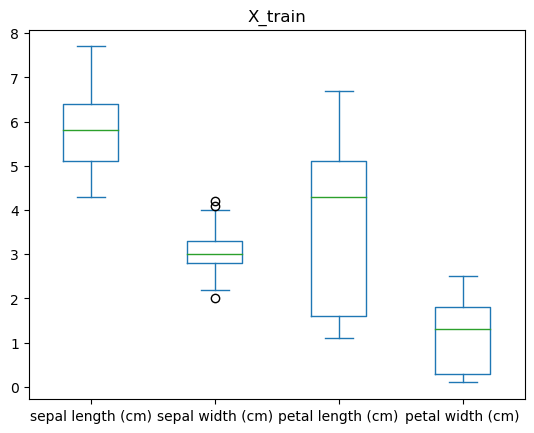

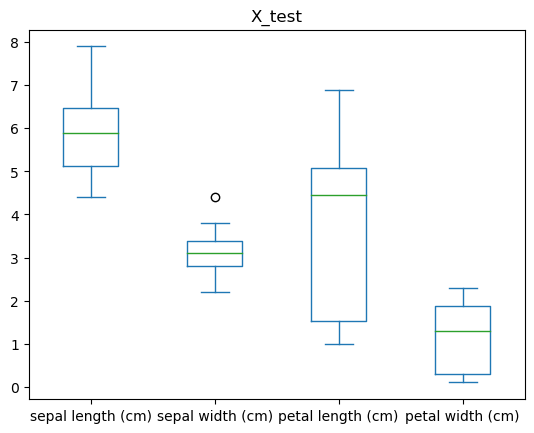

In [6]:
#2) 전처리   : 시각화 박스플롯을 그려보자  -> 피처마다 스케일이 다른 것을 확인  -> 정규화  
X_train.plot(kind = 'box');
plt.title ('X_train')
plt.show();
X_test.plot(kind ='box');
plt.title('X_test')
plt.show();

In [7]:
#3) 정규화  ->MinMaxScaler 값의 범위의 영향을 받지 않도록 전처리 -> pandas' DataFrame 타입도 지원한다.  
from sklearn.preprocessing import MinMaxScaler
mms =  MinMaxScaler()
X_train_scaled  =  mms.fit_transform(X_train)
X_test_scaled   =  mms.fit_transform(X_test)

In [8]:
#4)모델 생성 및 학습  KNeighborsClassifier  
# 모델을 인스턴스화 한후 스케일링한 데이터로 학습시킨다.  

model  =  KNeighborsClassifier(n_neighbors  = 5)  #이웃의 개수를 정의  , 거리측정 = metric 
model.fit(X_train_scaled ,y_train)


KNeighborsClassifier()

In [9]:
#print(help(KNeighborsClassifier ))

In [10]:
#5) 모델 예측 및 평가  : 스케일링한 테스트 셋으로 예측하고 KNN 모델의 정확도를 평가 
#Tip : 스케일링한 학습 데이터로 학습한 모델로 예측할 때는 , 예측할 데이터도 동일한 스케일링을 적용해야 한다. 
from sklearn.metrics import accuracy_score
pred  = model.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.974

#번외편 
 - kNN 알고리즘 학습하기전에는 변수의 범위를 축소해야 한다.  
 - 변수마다 측정범위가 다를 경우에 범위가 큰 변수가 모델에 과하게 큰영향을 미치고 , 범위가 작은 변수는 무시될 수 있다.  

### Q2)LinearSVC로 분류를 해보자 
    - start -> 데이터 50 이상  -> 카테고리데이터 -> 라벨있는 데이터  -> 데이터 수가 10만이하  
    - 커널을 사용하지 않는 SVM(지원 벡터 머신)을 기반으로 하는 클래스 분류 기법

(100, 2)
(100,)


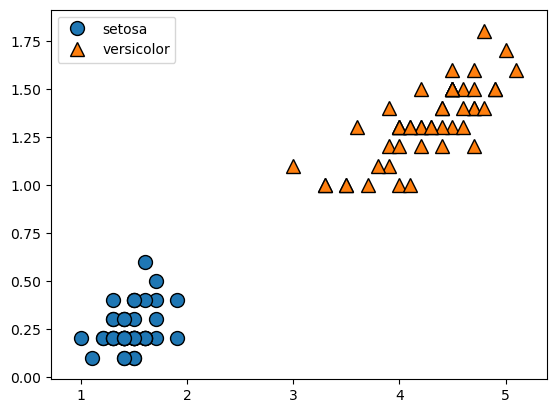

In [11]:
#1)  분류 형태를 확인  
import  matplotlib.pyplot  as  plt 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.svm  import  LinearSVC 
from  sklearn.datasets  import  load_iris 
import  mglearn     ##!pip install mglearn
iris  =  load_iris () 
X  =  iris . data [: 100 ,  2 :] 
Y  =  iris . target [: 100 ] 
print ( X . shape ) 
print ( Y . shape )
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show();

C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


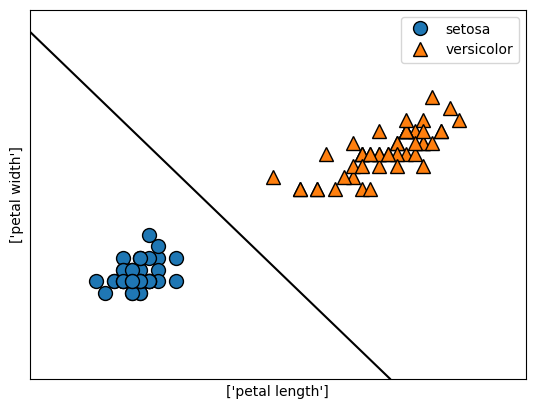

In [12]:
#2)  LinearSVC 를 이용해서 모형 구축  
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify= Y , random_state =0)

svm  = LinearSVC()
svm.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(svm,X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

plt.xlabel(['petal length'])
plt.ylabel(['petal width'])
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show();

(100, 2)
(100,)


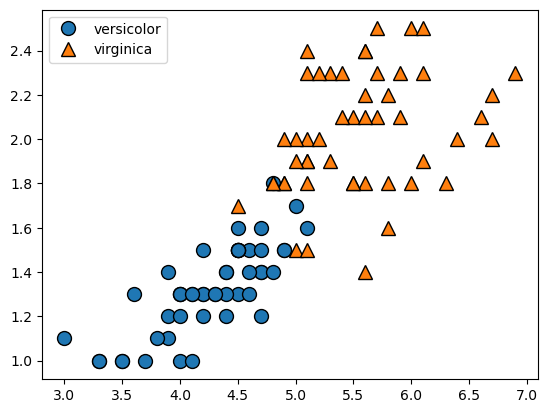

In [13]:
#3)데이터 겹침을 확인 해보자.  -> 선형모형을 이용한 SVC 모형 구축  
#versicolor, virginica 
iris  =  load_iris () 
X  =  iris . data [50:  ,  2 :] 
Y  =  iris . target [50:  ] -1
print ( X . shape ) 
print ( Y . shape )
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend([ 'versicolor','virginica'], loc='best')
plt.show();

### Q3) SVC 모델 사용 

(100, 2)
(100,)
[1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1]
0.96


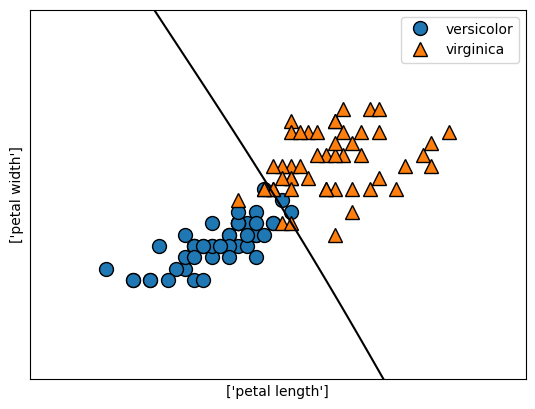

In [14]:
#4)SVC모델 적용
from sklearn.svm  import SVC

iris  =  load_iris () 
X  =  iris . data [50:  ,  2 :] 
Y  =  iris . target [50:  ] -1
print ( X . shape ) 
print ( Y . shape )

X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify= Y , random_state =0)

svm  = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)
print(pred)

res=accuracy_score(pred, y_test)
print(res)

mglearn.plots.plot_2d_separator(svm,X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

plt.xlabel(['petal length'])
plt.ylabel(['petal width'])
plt.legend(['versicolor','virginica'], loc='best')
plt.show();

(100, 2)
(100,)
[1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1]
1.0


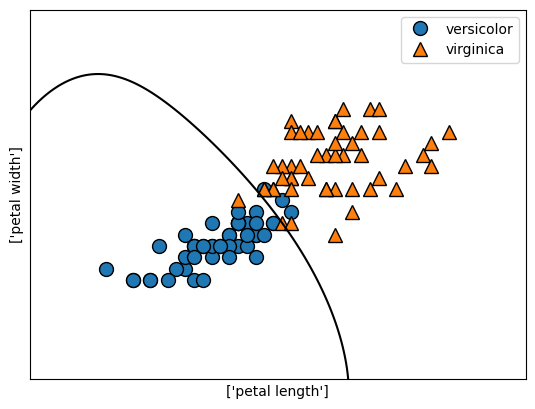

In [15]:
#5)SVC모델 적용 _하이퍼 파라미터 지정  
from sklearn.svm  import SVC

iris  =  load_iris () 
X  =  iris . data [50:  ,  2 :] 
Y  =  iris . target [50:  ] -1
print ( X . shape ) 
print ( Y . shape )

X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify= Y , random_state=0  )

svm  = SVC(kernel='rbf',  gamma = 1/2 , C=1.0 , class_weight= 'balanced', random_state=0 )
svm.fit(X_train, y_train)

pred = svm.predict(X_test)
print(pred)

res=accuracy_score(pred, y_test)
print(res)

mglearn.plots.plot_2d_separator(svm,X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

plt.xlabel(['petal length'])
plt.ylabel(['petal width'])
plt.legend(['versicolor','virginica'], loc='best')
plt.show();

In [16]:
#print(help(SVC))

### Q4) SVM

### Q5) SVR을 이용해서 클래스의 회귀값을 확인  / 커널을 확인 하자  

In [17]:
#1)logspace()를 사용해보자
import numpy as np   
res  = np.logspace(1,10,10, base =2) #지수함수 , 등비수열 배열을 사용
print(res)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [18]:
#2) linspace()  를 사용해보자  2의 n승 값 연습
a = np.linspace(1,10,10) 
base  =2
res  = base**a
print(res)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [19]:
from sklearn import preprocessing, linear_model,svm
#3) 샘플 데이터 생성  
numSample =80 #데이터 포인터 80개 생성
x=np.sort(5*np.random.rand(numSample, 1) , axis =0) #1차원 배열로 난수 배열로 균일분포를 만들겠다

y = np.sin(x).ravel() #x값 사인함수 계산하고 사인 곡선 데이터 생성 후 1차원 배열로 평탄화

#np.random.randn() -> 표준 정규 분포(평균 0 표준편차 1)을 구현하는 난수를 생성
y  = y  +  0.2 * (np.random.randn(numSample)) #난수들을 0.2배로 + y -> 사인 곡선에 노이즈 추가한다

x_true  = np.arange(0,5.0,0.1) #노이즈가 없는 정확한 사인 곡선
y_true  = np.sin(x_true).ravel() #노이즈가 없는 사인곡선 y값
print(x_true)
print(y_true)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[ 0.     0.1    0.199  0.296  0.389  0.479  0.565  0.644  0.717  0.783
  0.841  0.891  0.932  0.964  0.985  0.997  1.     0.992  0.974  0.946
  0.909  0.863  0.808  0.746  0.675  0.598  0.516  0.427  0.335  0.239
  0.141  0.042 -0.058 -0.158 -0.256 -0.351 -0.443 -0.53  -0.612 -0.688
 -0.757 -0.818 -0.872 -0.916 -0.952 -0.978 -0.994 -1.    -0.996 -0.982]


In [24]:
#4) SVR 로 데이터를 회귀성으로 분류를 하자, 오차율도 적용해보자. 
from sklearn.model_selection import GridSearchCV  # 최적의 하이퍼 파리미터 찾기  
sm  = svm.SVR()

#현재 모델이 가진 하이퍼 파라미터 키값을 리턴 해보자. -> 생성자의 매개인자를 키값으로 리턴  
print(sm.get_params().keys())
print(sm.get_params())

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [25]:
#최적의 파라미터를 찾자.  
kernel_list  = ['linear','poly','rbf','sigmoid']
C_list  =[1,2]
param ={'kernel' : kernel_list, 'C':C_list }
clf_svr = GridSearchCV(sm, param, cv = 5) 
clf_svr.fit(x,y)
y_res =clf_svr.fit(x,y).predict(x)
#y_res

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [26]:
#최적의 파람값 확인  
print('최적의 파람값 : ' ,clf_svr.best_params_)
print('점수  :' , clf_svr.best_score_)

최적의 파람값 :  {'C': 2, 'kernel': 'rbf'}
점수  : 0.02624876549293731


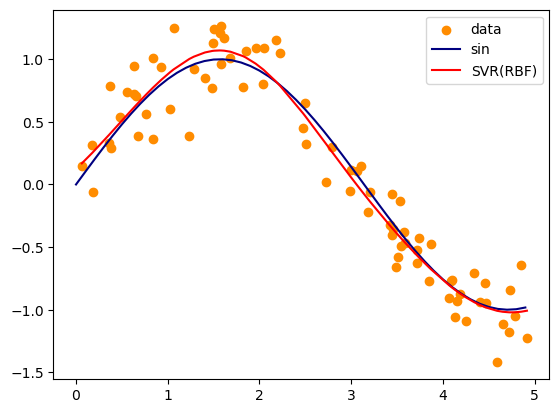

In [23]:
# 시각화로 결과 확인 해보자
plt.scatter(x,y, color ='darkorange', label= 'data');
plt.plot( x_true, y_true, color ='navy' , label ='sin');
plt.plot(x,y_res, color ='red', label ='SVR(RBF)');
plt.legend();
plt.show();

<Figure size 1200x900 with 0 Axes>

SVC(kernel='linear')

Text(0.5, 1.0, 'SVM with linear kernel')

SVC(kernel='poly')

Text(0.5, 1.0, 'SVM with poly kernel')

SVC()

Text(0.5, 1.0, 'SVM with rbf kernel')

SVC(kernel='sigmoid')

Text(0.5, 1.0, 'SVM with sigmoid kernel')

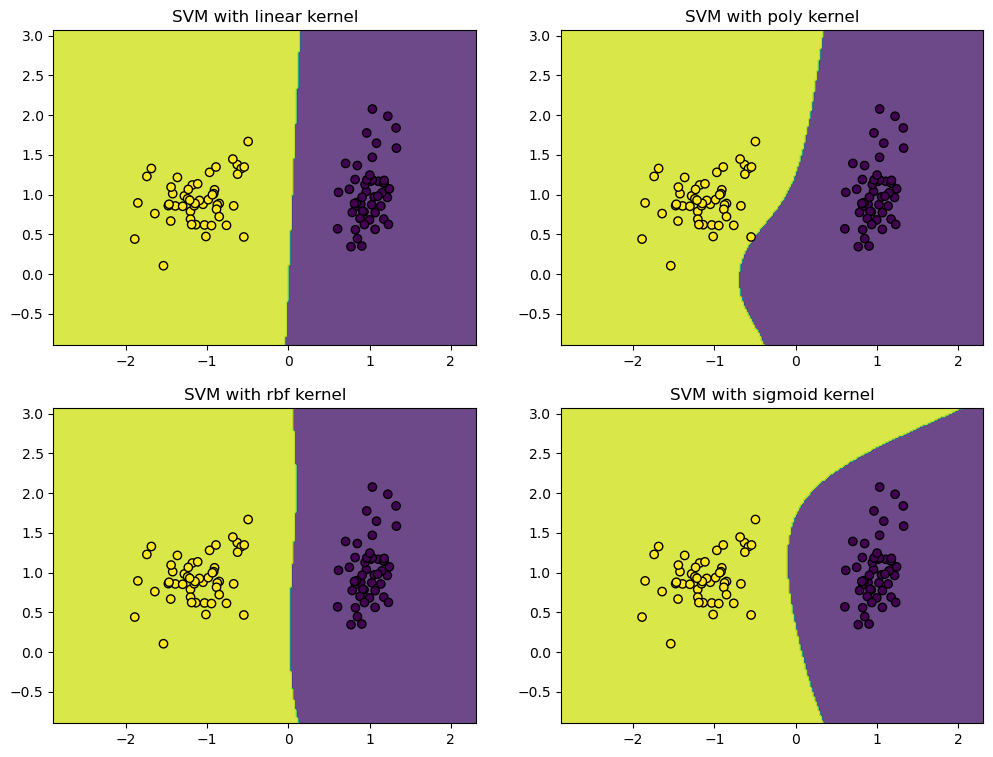

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1)

# SVM 모델을 각각의 커널로 학습
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [svm.SVC(kernel=k, C=1.0) for k in kernels]

# 시각화 설정
plt.figure(figsize=(12, 9))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.02),
                     np.arange(X1.min() - 1, X1.max() + 1, 0.02))

# 각 커널에 대해 모델 학습 및 시각화
for i, model in enumerate(models):
    ax = plt.subplot(2, 2, i + 1)
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X0, X1, c=y, edgecolors='k')
    ax.set_title(f'SVM with {kernels[i]} kernel')

SVC(C=1000, kernel='linear')

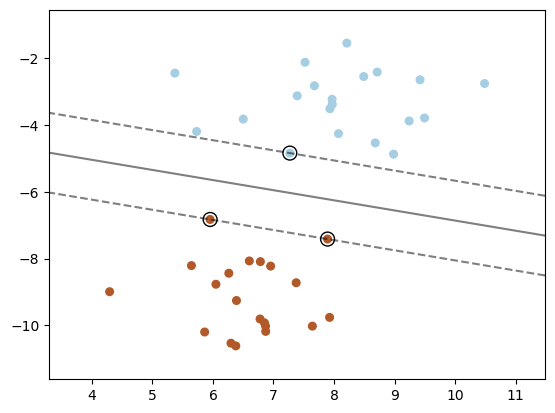

In [28]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs #데이터셋 생성
from sklearn.inspection import DecisionBoundaryDisplay #결정경계 시각화

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

SVC(C=1, kernel='linear')

<Figure size 400x300 with 0 Axes>

C:\Users\taeeon.kim\AppData\Local\Temp\ipykernel_10844\4077886142.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


(-5.500, 5.500, -8.991, 9.715)

(-4.800, 4.200)

(-6.000, 6.000)

([], [])

([], [])

SVC(C=0.05, kernel='linear')

<Figure size 400x300 with 0 Axes>

C:\Users\taeeon.kim\AppData\Local\Temp\ipykernel_10844\4077886142.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


(-5.500, 5.500, -9.193, 9.240)

(-4.800, 4.200)

(-6.000, 6.000)

([], [])

([], [])

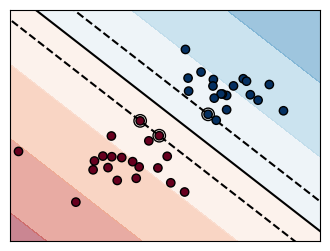

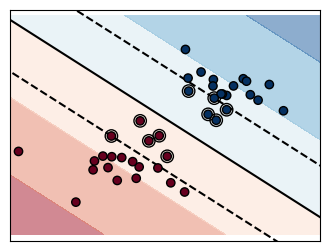

In [30]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

### SVM 사용해서 선형 분류 문제를 해결하고, 서로 다른 정규화 강도(c)에 따른 결정경계와 마진을 최적화 한다

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [33]:
np.linspace(-5, 5)

array([-5.   , -4.796, -4.592, -4.388, -4.184, -3.98 , -3.776, -3.571,
       -3.367, -3.163, -2.959, -2.755, -2.551, -2.347, -2.143, -1.939,
       -1.735, -1.531, -1.327, -1.122, -0.918, -0.714, -0.51 , -0.306,
       -0.102,  0.102,  0.306,  0.51 ,  0.714,  0.918,  1.122,  1.327,
        1.531,  1.735,  1.939,  2.143,  2.347,  2.551,  2.755,  2.959,
        3.163,  3.367,  3.571,  3.776,  3.98 ,  4.184,  4.388,  4.592,
        4.796,  5.   ])

In [40]:
#<<아이리스 데이터로 SVM을 구현해보자 >>
# 최적화 파라미터를 찾자 -> 적용해 보자
### SVM 사용해서 선형 분류 문제를 해결하고, 서로 다른 정규화 강도(c)에 따른 결정경계와 마진을 최적화 한다

import matplotlib.pyplot as plt
from sklearn import datasets 
import numpy as np
from sklearn.model_selection import GridSearchCV  # 최적의 하이퍼 파리미터 찾기  
from sklearn.svm import SVC

# we create 40 separable points
iris = datasets.load_iris()
X= iris.data
Y= iris.target

#split
train_X, val_X, train_y,val_y = train_test_split(X,Y, random_state=0)

sm  = SVC()

#현재 모델이 가진 하이퍼 파라미터 키값을 리턴 해보자. -> 생성자의 매개인자를 키값으로 리턴  
print(sm.get_params().keys())
print(sm.get_params())
print('============================')

kernel_list  = ['linear','poly','rbf','sigmoid']
C_list  =[0.1,1,10,100]
gamma = [1,0.1,0.01,0.001] #커널 함수의 "폭"조절 -> 과소적합,과대적합일 발생 하므로 교차검증 최적화
param ={'kernel' : kernel_list, 'C':C_list , 'gamma':gamma }

#5. GridSearchCV 설정
clf_svr = GridSearchCV(sm, param, cv = 5) 

#6. 수행
clf_svr.fit(X,Y)
y_res =clf_svr.fit(X,Y).predict(X)

#7. 결과 출력  
print('최적의 파람값 : ' ,clf_svr.best_params_)
print('점수  :' , clf_svr.best_score_)
print('============================')


dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

최적의 파람값 :  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
점수  : 0.9800000000000001
